In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data and Data Preparation

Changing names to readable names,dropping null values, converting string to datetime values, setting datetime values as index



In [2]:
train_data  = pd.read_csv("/content/Perrin Freres monthly champagne sales millions.csv")
train_data.head()
train_data.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [3]:
train_data.columns = ['Month','Sales']
train_data

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [4]:
train_data.drop(105,axis = 0,inplace = True) #Dropping null values
train_data.drop(106,axis = 0,inplace = True)
train_data

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [5]:
#convert month to datetime
train_data['Month'] = pd.to_datetime(train_data['Month'])
train_data.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [6]:
#setting datetime values as index
train_data.set_index('Month',inplace = True)
train_data

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


#Visualization


<Axes: xlabel='Month'>

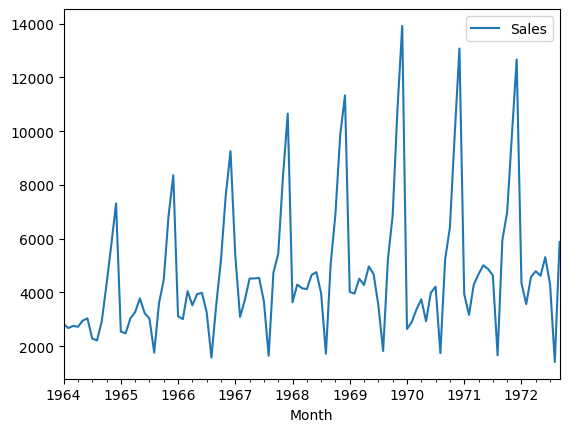

In [7]:
train_data.plot() # seasonal data

In [ ]:
pip install statsmodels

In [8]:
# Convert Seasonal data to stationary
from statsmodels.tsa.stattools import adfuller

In [9]:
test_result = adfuller(train_data['Sales'])


In [10]:
#H0 : Data is not stationary
#H1 : Data is stationary

def adfuller_test(sales):
  result = adfuller(sales)
  labels = ['ADF Test statistic' , 'p-value' , '#Lags used' ,'Number of observations used']
  for value, label in zip(result, labels):
    print(label + ' : ' + str(value))
  # print(result[1])
  if result[1] <= 0.05:
    print("reject the null hypothesis DATA IS STATIONARY")
  else:
    print("Accept Null hypothessis DATA IS NOT STATIONARY")


In [11]:
adfuller_test(train_data['Sales'])

ADF Test statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags used : 11
Number of observations used : 93
Accept Null hypothessis DATA IS NOT STATIONARY


# Convert NON-STATIONARY TO STATIONARY DATA

#DIFFERENCING


In [12]:
train_data['Sales First Difference'] = train_data['Sales'] - train_data['Sales'].shift(12)  #12 becoz a year has 12 months and seasonal data means it repeats every 12 months
train_data

,Sales,Sales First Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
...,...,...
1972-05-01,4618.0,-392.0
1972-06-01,5312.0,438.0
1972-07-01,4298.0,-335.0


In [13]:
adfuller_test(train_data['Sales First Difference'].dropna())  #.dropna() drops all NaN values

ADF Test statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags used : 0
Number of observations used : 92
reject the null hypothesis DATA IS STATIONARY


<Axes: xlabel='Month'>

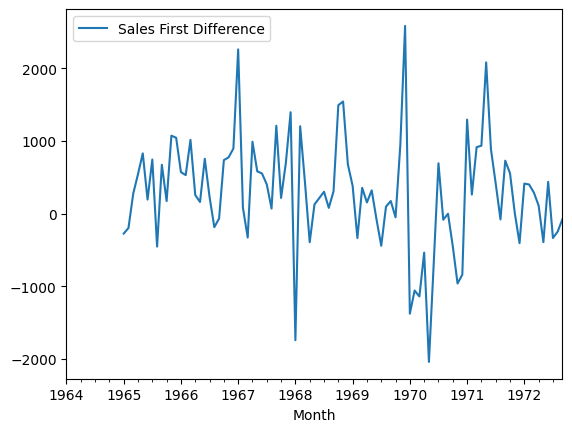

In [14]:
train_data.plot(y='Sales First Difference')

In [15]:
train_data['Sales']

Month
1964-01-01    2815.0
1964-02-01    2672.0
1964-03-01    2755.0
1964-04-01    2721.0
1964-05-01    2946.0
               ...  
1972-05-01    4618.0
1972-06-01    5312.0
1972-07-01    4298.0
1972-08-01    1413.0
1972-09-01    5877.0
Name: Sales, Length: 105, dtype: float64

# Auto Regressive Model

y = C + phy1 yt-1 + phy2 yt-2 + ..... phyn yt-n + e

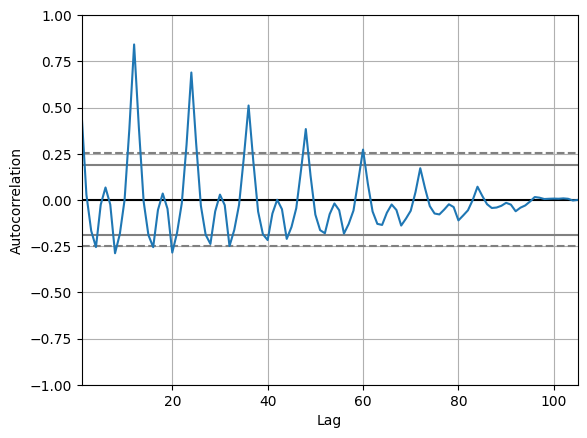

In [16]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train_data['Sales'])
plt.show()

#P,D,Q
p - ar model lags

d - differencing

q - MA lags

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


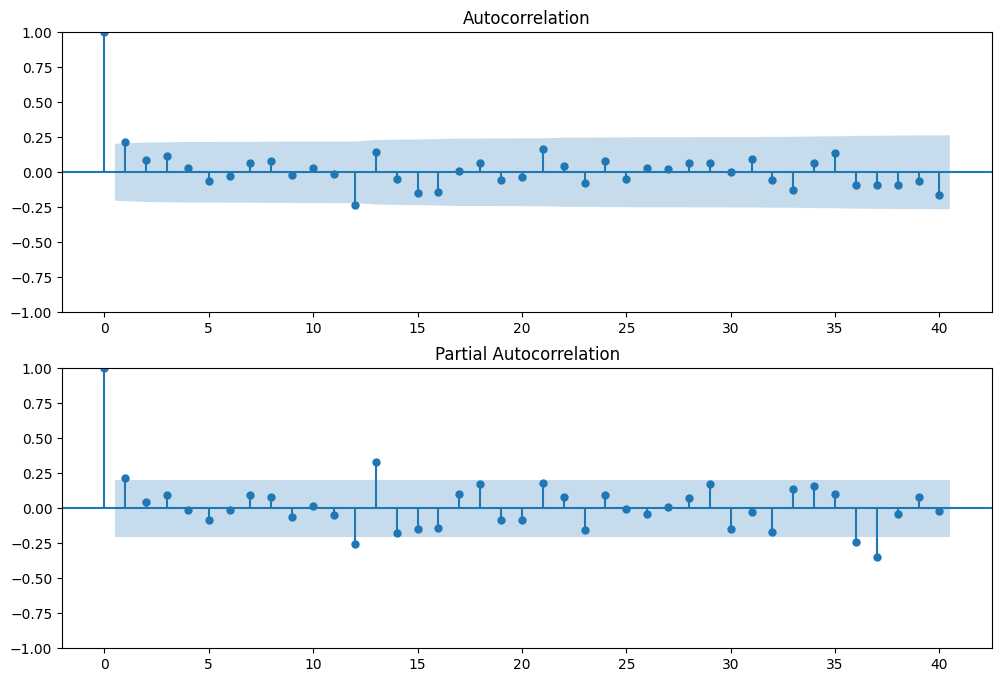

In [18]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(train_data['Sales First Difference'].dropna(),lags=40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(train_data['Sales First Difference'].dropna(),lags=40,ax = ax2)

P = 1 # PACF
Q = 1
d = 1 # number of times we shift here we shift only 1ce ie Sales first shift

In [ ]:
# # ARIMA ONLY FOR NON SEASONAL DATA
# from statsmodels.tsa.arima.model import ARIMA
# model = ARIMA(train_data['Sales'], order = (1,1,1))
# model_fit = model.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

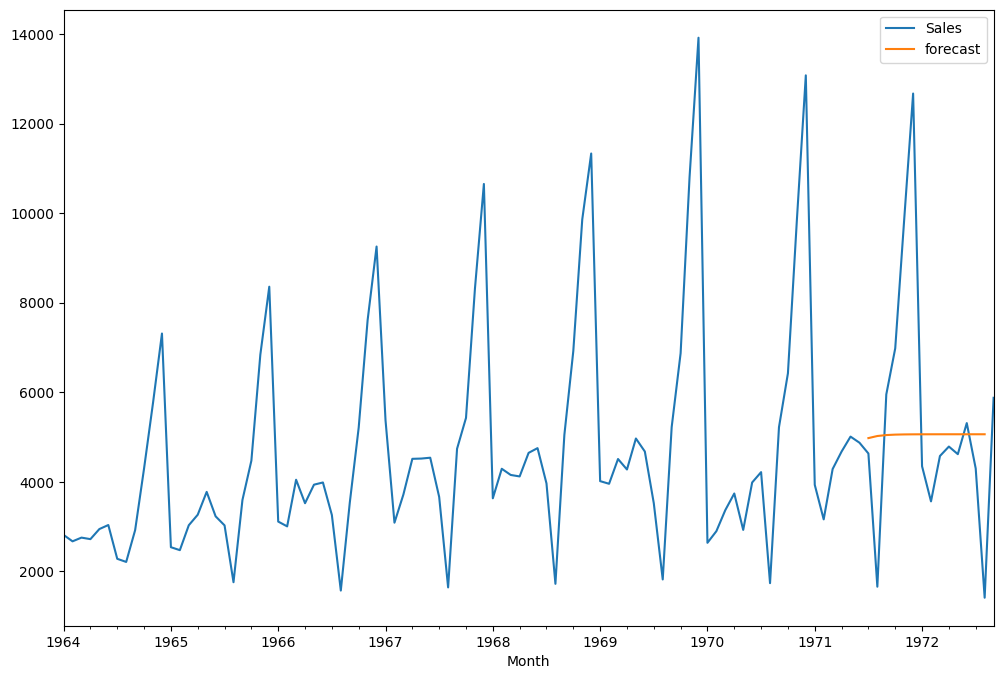

In [ ]:
# train_data['forecast'] = model_fit.predict(start = 90, end = 103, dynamic = True)
# train_data[['Sales','forecast']].plot(figsize=(12,8))


#SARIMAX

In [19]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train_data['Sales'], order = (1,1,1), seasonal_order = (1,1,1,12)) # Seasonal order has last as 12 becouse shift value is 12
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

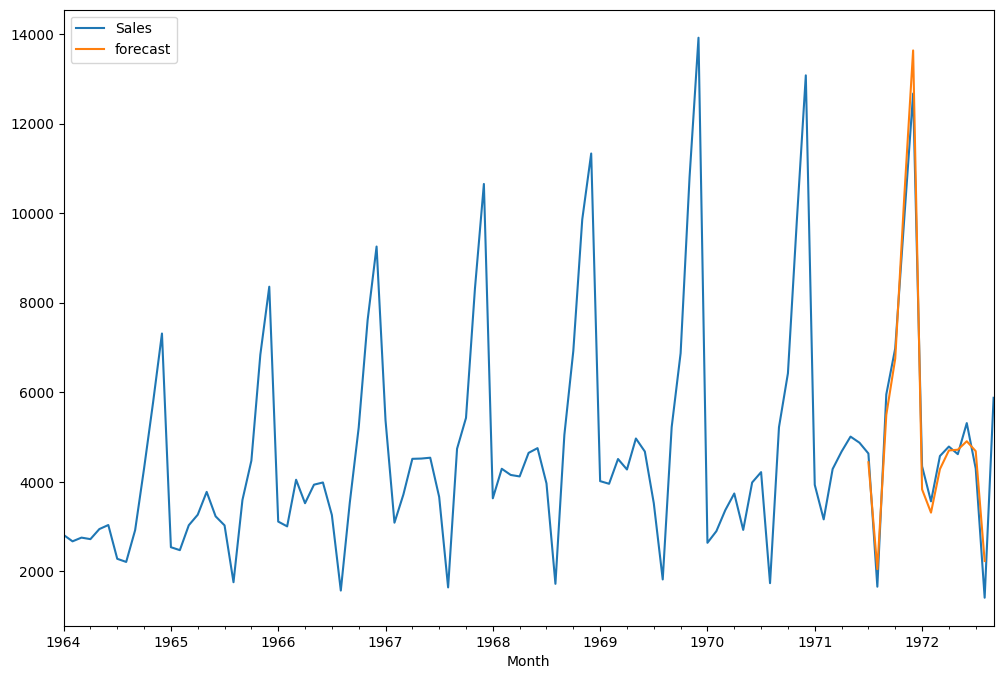

In [20]:
train_data['forecast'] = results.predict(start=90, end = 103, dynamic = True)
train_data[['Sales','forecast']].plot(figsize=(12,8))

In [21]:
from pandas.tseries.offsets import DateOffset
future_dates = [train_data.index[-1] + DateOffset(months = x) for x in range(0,36)]

In [22]:
future_dates_df = pd.DataFrame(index = future_dates[1:], columns = train_data.columns)
future_dates_df

,Sales,Sales First Difference,forecast
1972-10-01,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN


In [23]:
future_df = pd.concat([train_data,future_dates_df])

<Axes: >

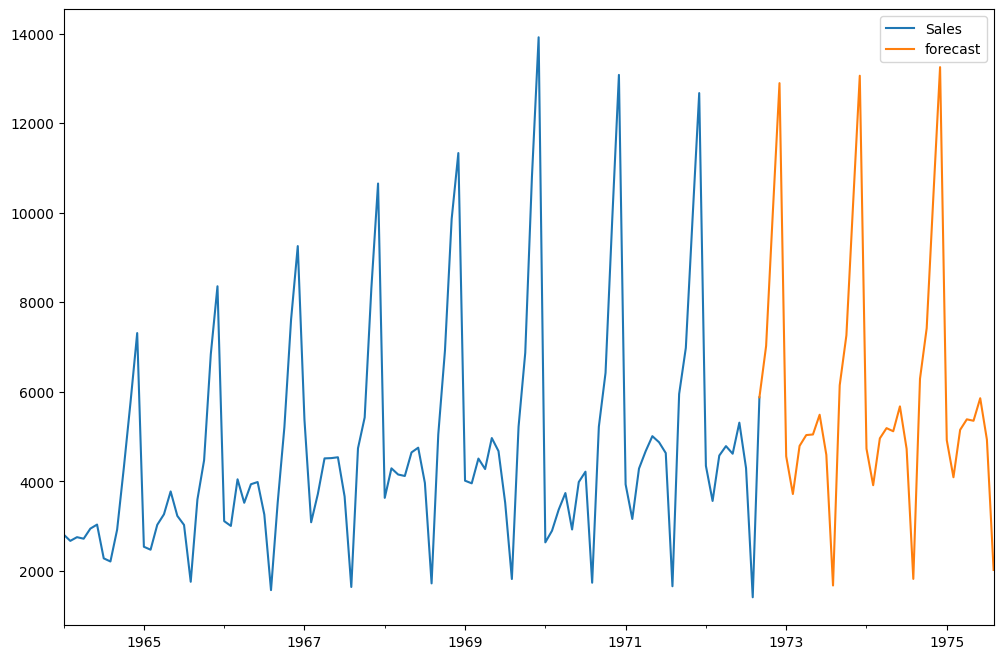

In [24]:
future_df['forecast'] = results.predict(start=104, end = 240, dynamic = True)
future_df[['Sales','forecast']].plot(figsize=(12,8))